<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

Real random numbers are generated by physical random processes such as radioactivity or noise in circuits. Thus, they are "actual" random numbers which will not repeat. These are called random number generators (RNGs). Algorithms can be developed to mimic such random events to produce seemingly random strings of numbers. However, because they are deterministic, they may not produce truly random numbers and can only produce non-repeating randomly generated numbers up till a certain point. Modern versions of these algorithms can run for a very long time before numbers start to repeat and so these are sufficient to use for most purposes requiring a RNG. These are called pseudo RNGs (PRNGs).

### 1.2 NumPy’s PRNG

In [4]:
print(np.random.rand())                # Give one number
print(np.random.rand(10))              # Give ten numbers`
print(np.random.rand(5,2))             # Give five sets of 2

# These generate random numbers between 0 and 1 that are more or less evenly distributed across the intervals between
# 0 and 1

0.5379436123974748
[0.4306919  0.42249873 0.80562922 0.32965433 0.3202323  0.28450644
 0.34547448 0.41991383 0.51063549 0.92238482]
[[0.38648483 0.01857622]
 [0.42471345 0.56106135]
 [0.71983126 0.27663841]
 [0.32878239 0.90900125]
 [0.11264955 0.72191893]]


In [6]:
n = 10000
random_numbers = np.random.rand(n)

# The numbers less than .5 must be about 50%
print(np.sum(random_numbers < .5) / n * 100)

# The numbers less than .25 must be about 25%
print(np.sum(random_numbers < .25) / n * 100)

# The numbers more than .75 must be about 25%
print(np.sum(random_numbers > .75) / n * 100)

49.39
23.94
25.569999999999997


### 1.3 A simple graphical test

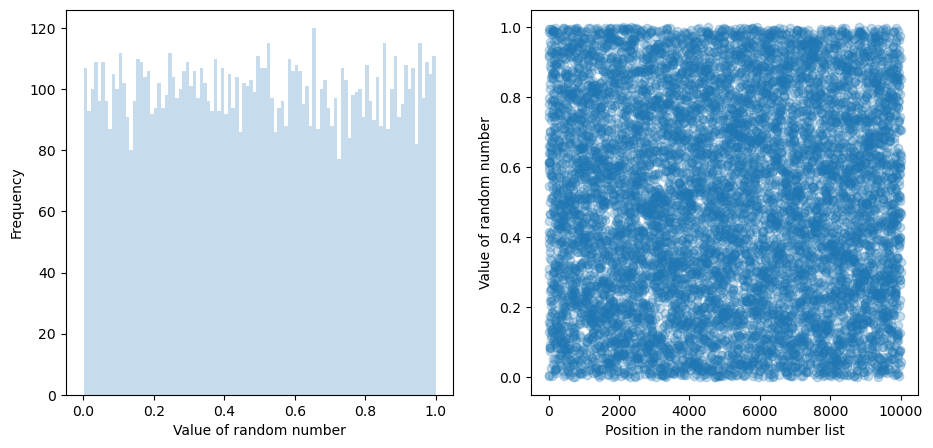

In [18]:
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

# First figure is a histogram showing the distribution of values of the random numbers generated. All the numbers are 
# fairly evenly distributed with a low of around 75% and a high of around 125%. The second figure is a scatterplot
# showing the relationship between the value of any random number generated and its position in the list (i.e. the time
# at which it is generated). There is no correlation and all points fall in any part of the plot. Therefore, all the
# numbers likely have an equal chance of being generated at any one point.

### 1.4 Uniformly beyond \([0,1)\)

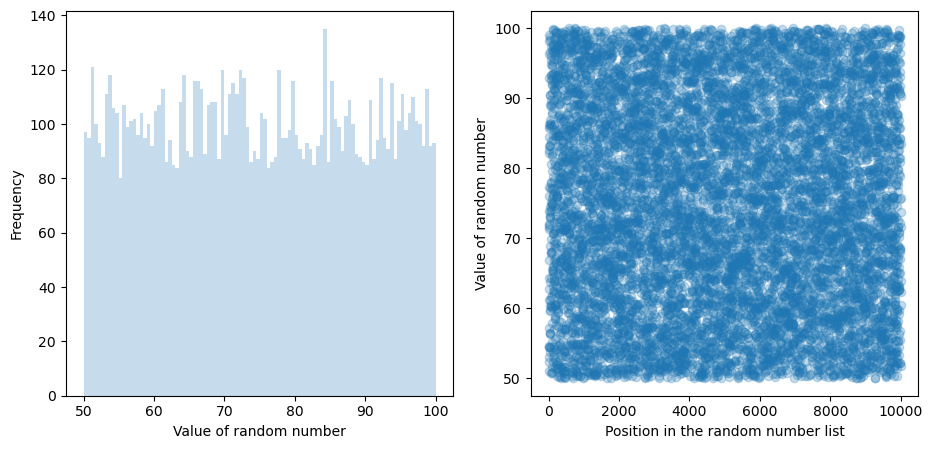

In [20]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

# This time, the randomly generated numbers are between 50 and 100.

### 1.5 ‘seeding’ a PRNG

In [40]:
print(np.random.randint(0, 100, 10))     # Ten integers between 0 and 100
print(np.random.randint(0, 100, 10))     # Another ten integers between 0 and 100

# Will keep producing new randomly generated numbers

[38  7 67  5 47 47 15 34 10 28]
[ 4 82 89 55 78 23 50 62 55 84]


In [41]:
np.random.seed(1234)              # Specifying a seed
print(np.random.randint(0, 100, 10))     # Ten integers between 0 and 100

# You can specify the seed in which to generate a set of random numbers. Afterwards, when using the same seed, the same
# set of random numbers will be generated

[47 83 38 53 76 24 15 49 23 26]


In [36]:
np.random.seed(1234)
print(np.random.randint(0, 100, 10))     # Same ten integers between 0 and 100

[47 83 38 53 76 24 15 49 23 26]


## 2 Simulating a Magic-8 Ball

In [47]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')
    
# Will randomly pick from the list of options

Q: Will I be pretty?
A: Most likely.

Q: Will I be rich?
A: Yes definitely.

Q: Will I be in trouble?
A: Outlook good.



## 3 Flipping Coins

### 3.1 A fair coin

In [59]:
np.random.choice(['Head', 'Tails'])

# Returns one random roll

'Head'

In [58]:
no_of_coins = 10
print(np.random.choice(['Head', 'Tails'], no_of_coins))

# Returns 10 random rolls

['Head' 'Tails' 'Tails' 'Tails' 'Tails' 'Tails' 'Tails' 'Tails' 'Head'
 'Tails']


In [64]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater than 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

# Using probalities allows us to determine the probability and, therefore, the distribution of each possibility in our
# list of options
# Here, probability is 0.5 since we are dealing with 2 possibilities with equal chances.

Number of heads: 51.50%


### 3.2 A biased coin

In [65]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

# Decrease probability of getting a tail to 0.3 so that probability of getting a head is now 0.7

Number of heads: 68.50%


### 3.3 A flipping experiment

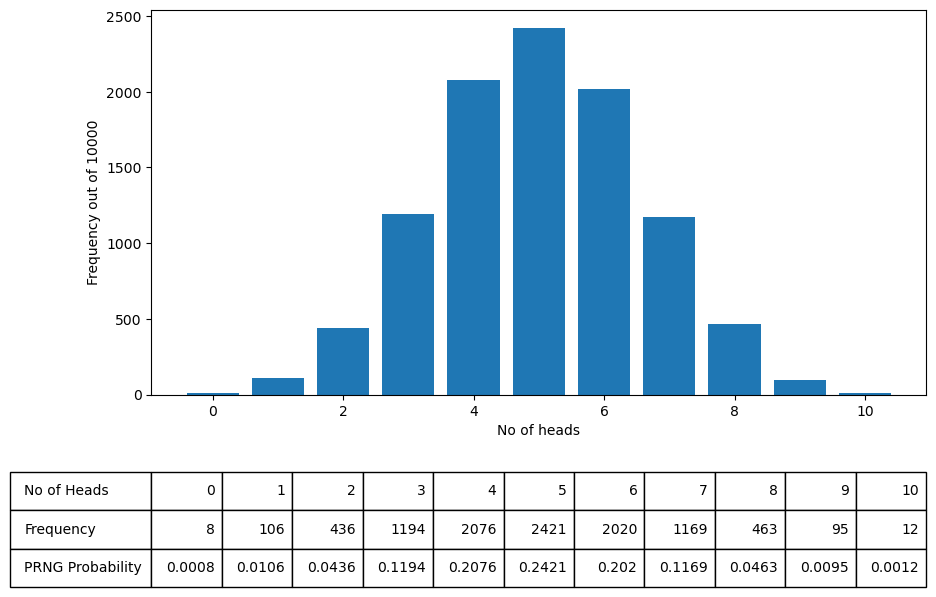

In [68]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [71]:
from scipy.stats import binom

# For discrete distributions, we can obtain the various probabilities using pmf() which stands for probabiity mass
# function 

binom.pmf(k=7, n=10, p=.5)

# This gives us the probability of getting 7 heads when we throw 10 fair (i.e. probability = 0.5) coins

0.11718749999999999

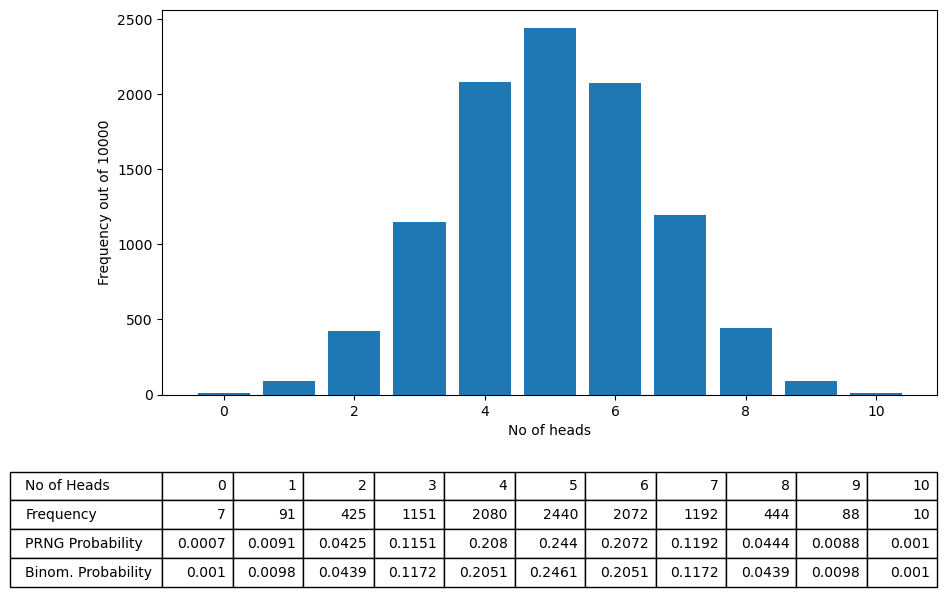

In [78]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, np.round(binomial_probabilities, decimals=4)],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Binom. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

# Addition of the binomial probabilities into the plot

## Exercise 1 :  12C, 13C

In [343]:
#1

def count_carbon():
    total_c = np.random.rand(27)
    prob_13 = np.sum(total_c > 0.9889)
    return prob_13

result = [count_carbon() for _ in range(1000)]
result_np = np.array(result)

mean_c13 = np.mean(result_np)
sd_c13 = np.std(result_np)

print("Mean for the number of 13C atoms:", mean_c13)
print("Standard deviation for the number of 13C atoms:", sd_c13)

#2

def count_c12():
    total_c = np.random.rand(27)
    prob = np.sum(total_c < 0.9889)
    return prob

result_2_py = [count_c12() for _ in range(1000)]
result_2 = np.array(result_2_py)
sum_c12 = np.sum(result_2 > 26)/len(result_2)
print("Probability of having no 13C atoms in a cholesterol molecule:", sum_c12)

Mean for the number of 13C atoms: 0.304
Standard deviation for the number of 13C atoms: 0.5436763743257564
Probability of having no 13C atoms in a cholesterol molecule: 0.727
